In [521]:
%load_ext autoreload
%autoreload 2
from DeepQLearning_env import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Question 11

In [506]:
trainer = DeepQTraining()
trainer.train(lambda e: 0.1, 0.5, self_training=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [05:37<00:00, 59.28it/s]


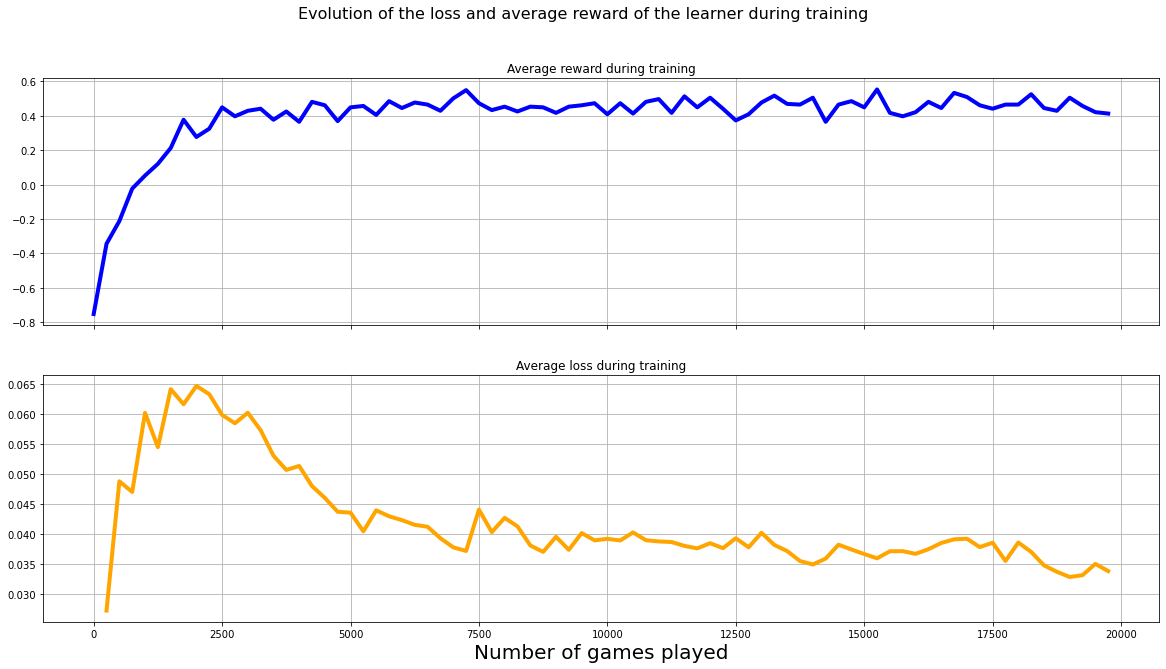

In [507]:
trainer.plot_avg_reward_loss_during_training()

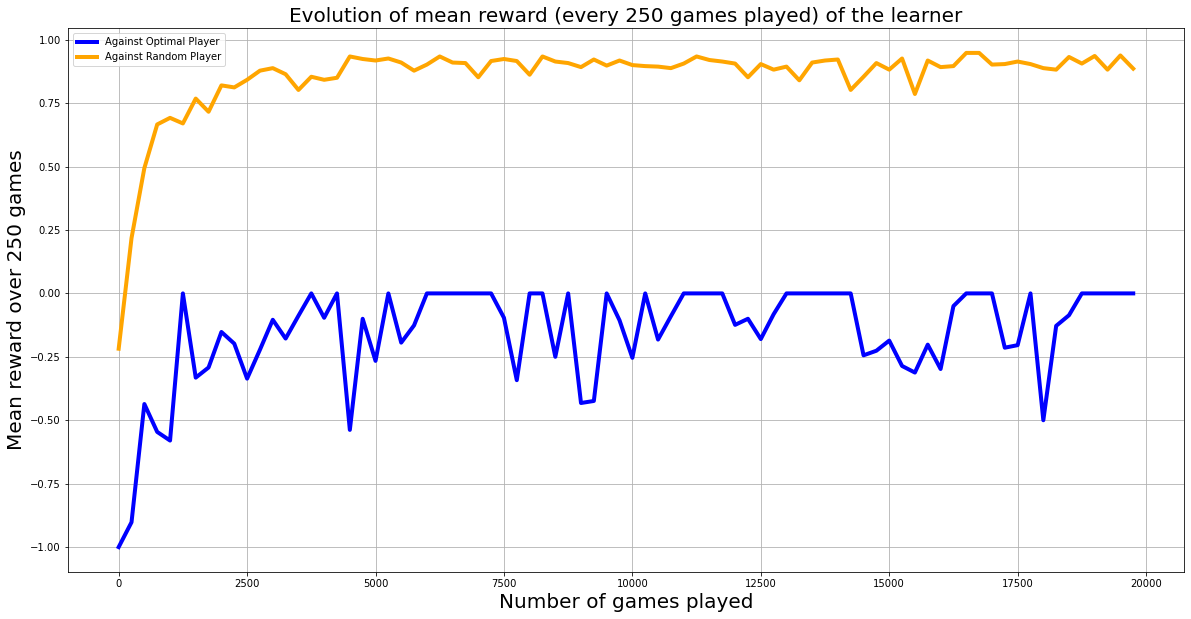

In [509]:
trainer.plot_mopt_mrng_during_training()

### Question 12

In [510]:
trainer2 = DeepQTraining(buffer_size=1, batch_size=1)
trainer2.train(lambda e: 0.1, 0.5, self_training=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [05:05<00:00, 65.52it/s]


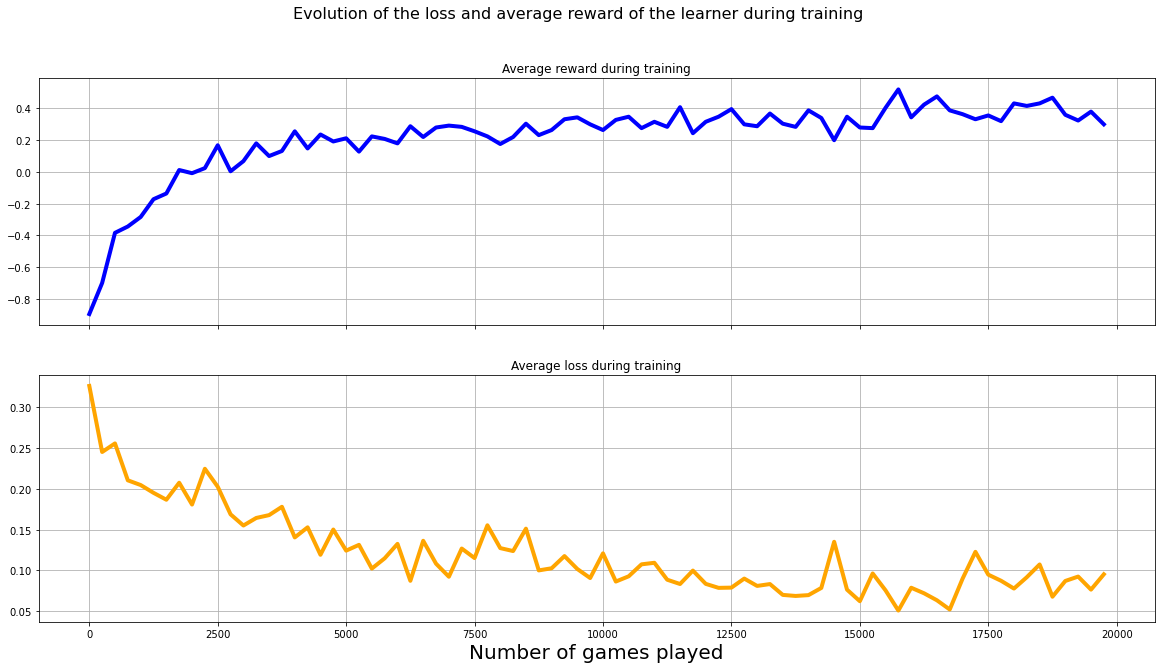

In [511]:
trainer2.plot_avg_reward_loss_during_training()

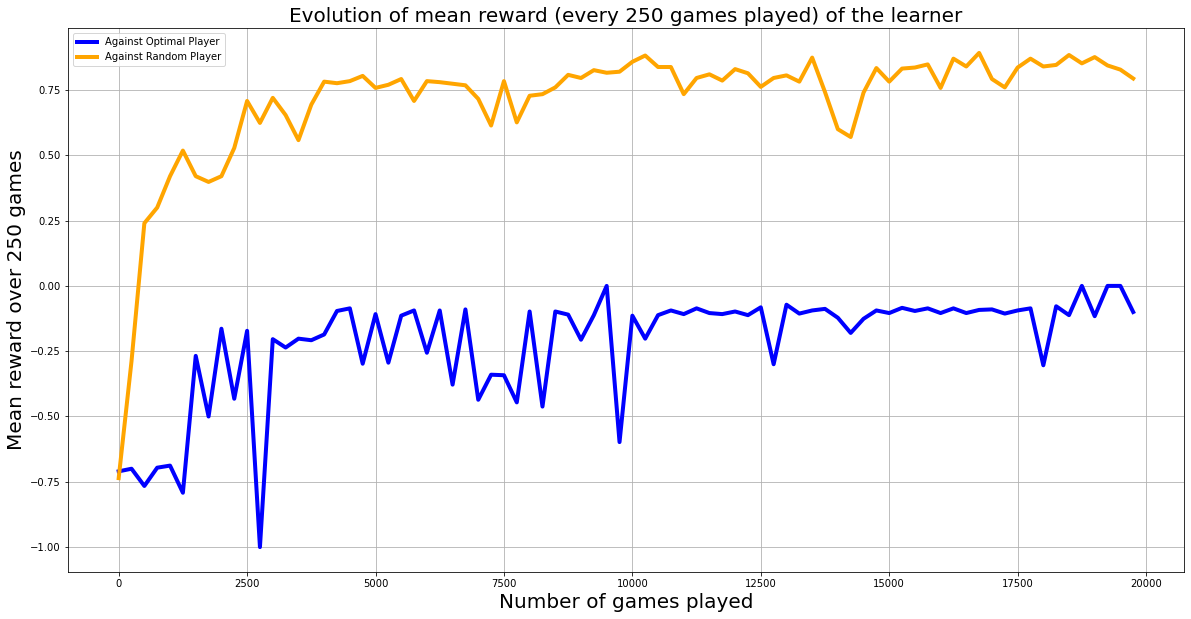

In [512]:
trainer2.plot_mopt_mrng_during_training()

### Question 13

In [513]:
n_stars = [1, 5000, 10000, 15000, 25000, 40000]
epsilon_min = 0.1
epsilon_max = 0.8

values = []
values_mopt_mrng = []
names = []
epochs = 0
avg_step = 0

for n_star in n_stars:
    epsilon_greedy_policy = lambda ep: max(epsilon_min, epsilon_max*(1-ep/n_star))
    training2 = DeepQTraining()
    training2.train(epsilon_greedy_policy, 0.5, self_training=False)
    epochs = training2.epoch
    avg_step = training2.avg_step
    
    values.append(training2.avg_reward)
    values_mopt_mrng.append([training2.score_test_opt, training2.score_test_rng])
    names.append(f"$n^*=${n_star}")
    
plots_several_trainings(values, names, avg_step, epochs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [05:21<00:00, 62.16it/s]


AttributeError: 'DeepQTraining' object has no attribute 'avg_step'

### Question 14

In [ ]:
# Part 2.1.2

n_star_best = 5000

epsilon_opts = [0.0, 0.1, 0.3, 0.5, 0.8, 1.0]
epsilon_min = 0.1
epsilon_max = 0.8
epsilon_greedy_policy = lambda ep: max(epsilon_min, epsilon_max*(1-ep/n_star_best))

values = []
values_mopt_mrng = []
names = []
epochs = 0
avg_step = 0

for epsilon_opt in epsilon_opts:
    training2 = DeepQTraining()
    training2.train(epsilon_greedy_policy, epsilon_opt, self_training=False)
    epochs = training2.epoch
    avg_step = training2.avg_step
    
    values.append(training2.avg_reward)
    values_mopt_mrng.append([training2.score_test_opt, training2.score_test_rng])
    names.append(f"epsilon_opt={epsilon_opt}")
    
plots_several_trainings(values, names, avg_step, epochs)

### Question 15

In [486]:
# TODO 

### Question 16

In [ ]:
# Part 2.1.2
epsilon_opts = [0.0, 0.1, 0.3, 0.5, 0.8, 1.0]

values = []
values_mopt_mrng = []
names = []
epochs = 0
avg_step = 0

for epsilon_opt in epsilon_opts:
    training2 = DeepQTraining()
    training2.train(lambda ep: epislon_opt, epsilon_opt, self_training=True)
    epochs = training2.epoch
    avg_step = training2.avg_step
    
    values.append(training2.avg_reward)
    values_mopt_mrng.append([training2.score_test_opt, training2.score_test_rng])
    names.append(f"epsilon_opt={epsilon_opt}")
    
plots_several_trainings(values, names, avg_step, epochs)

### Question 17

In [ ]:
n_stars = [1, 5000, 10000, 15000, 25000, 40000]
epsilon_min = 0.1
epsilon_max = 0.8

values = []
values_mopt_mrng = []
names = []
epochs = 0
avg_step = 0

for n_star in n_stars:
    epsilon_greedy_policy = lambda ep: max(epsilon_min, epsilon_max*(1-ep/n_star))
    training2 = DeepQTraining()
    training2.train(epsilon_greedy_policy, 0.5, self_training=True)
    epochs = training2.epoch
    avg_step = training2.avg_step
    
    values.append(training2.avg_reward)
    values_mopt_mrng.append([training2.score_test_opt, training2.score_test_rng])
    names.append(f"$n^*=${n_star}")
    
plots_several_trainings(values, names, avg_step, epochs)

### Quetion 18

### Question 19

In [516]:
# Same position as in Q-learning

states = ["---------", "XX-OO----", "X--O-X-O-"]
titles = ["Starting board", "Winning position", "Tactical move"]

# situation1: Starting board
"""
- - -
- - -
- - -
"""
# situation2: Winning position
""" 
X X -
O O -
- - -
"""

# situation3: Tactical move
""" 
X - -
O - X
- O -
"""

# Train the self-learners to obtain final Q-values
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 10000 # TODO change to the best n_start
training_heat = DeepQTraining()
training_heat.train(lambda ep: max(epsilon_min, epsilon_max*(1-ep/n_star)), 0.5, run_test=False, self_training=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:25<00:00, 97.11it/s]


In [522]:
grids = [
    np.array([[]])
]
plot_game_heatmaps_deep_qlearning(states, training_heat.agent1,,["X","O","X"], titles)

AttributeError: 'DeepQTraining' object has no attribute 'Q_vals'